# Lab 2

## Linear regression and gradient descent

![Mountains](https://lh3.googleusercontent.com/GGMHKwLa9F77J07BdQnK0uBDLr5BwCWZsxllP0Vj2HXSv58PlM7VirZmH6NrZtx1_QiY2isOEsWllnmD-l8facskaWsc3hMiYpChCsayA585e8ySc5tXq8YO3koNcBIgqpLRUqRDMchAh-lug7AnP1yLG1FDo8pC0L9q2S8Mb_fTgfaNcncSgtn_znetWW4lVnT4WTHgLrt8380SErJZvVE0dHFzWgE9PaU-p-ZFm77j3CSDeLqEgT_1ugA1dwQ5h921XMSJlsVv7_fNT7Wbb3wJOyJz-oq5KYtZMaY5S5F7ewt9IhQAz9kS2u2r5q6jiZZw_gNvZNSEm80Gqr66LlO5N9URpu9-JwXLCs52pdzsDcbH8P7gkLE_R3Xgd6c2lidCyRC3Kh6o9-OGPpIxbFihhk4yBgZc0CSHL3QRknqfcjksCyc5DxstPrKSFNdHBkyuaIXutzbVEqmjct-iOLm3LzlAl_3mkfIat9T2PvX4TDTIpkYflgHF7fGzI80mi5qQtLYxl6b9gQEHH2wsWImP8QQHYuhCSNBlsoQ4uovHUPVf_AUdpEfzKHvK8rs8L0xAMUEZmtxY8Ilxf4Z8w_EPcF2w2wGTQs7mWrFOe6qP4llBLl-BsVlPKDftzaUq0VgA4QMmfSNbJTK4u0F4gshwKPbG1qevaw=w2270-h1512-no =500x)

*How cost function can look if plot it on 2 independent variables.*

 📷Photo from: https://www.instagram.com/yagfarov

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download datasets

In [2]:
# House dataset
!wget https://raw.githubusercontent.com/RocketFlash/introduction_to_ML_Innopolis/master/lab2_house_data.csv
# Miles per galon prediction data
!wget https://gist.githubusercontent.com/omarish/5687264/raw/7e5c814ce6ef33e25d5259c1fe79463c190800d9/mpg.csv

--2018-08-29 07:47:31--  https://raw.githubusercontent.com/RocketFlash/introduction_to_ML_Innopolis/master/lab2_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘lab2_house_data.csv.1’

lab2_house_data.csv 100%[===================>]   2.40M  --.-KB/s    in 0.1s    

2018-08-29 07:47:32 (16.7 MB/s) - ‘lab2_house_data.csv.1’ saved [2515206/2515206]

--2018-08-29 07:47:33--  https://gist.githubusercontent.com/omarish/5687264/raw/7e5c814ce6ef33e25d5259c1fe79463c190800d9/mpg.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent

Let's consider simple linear data case. $y_{i}$ - is our guess, value that our model considers and $\hat{y_{i}}$ is a ground truth.

$$y = \beta_{1}x + \beta_{0}$$

$$J = MSE = \frac{1}{n}\sum_{i=1}^{n} (\hat{y_{i}}- y_{i})^{2}$$

Our goal is to minimize cost function $J$

For linear model cost fuction is:

$$J = \frac{1}{n}\sum_{i=1}^{n} (\hat{y_{i}}- (\beta_{1}x + \beta_{0}))^{2}$$

In [0]:
def generate_data(b1, b0, size, x_range = (-10, 10), noise_mean = 0, 
                  noise_std = 1):
  """
	input:
	b1, b0 - true parameters of data
	size - size of data, numbers of samples
  x_range - tuple of (min, max) x-values
  noise_mean - noise mean value
  noise_std - noise standard deviation
	
	output:
	data_x, data_y - data features
	"""
  noise = np.random.normal(noise_mean, noise_std, size)
  # rnd_vals = np.random.rand(size)
  # data_x = np.random.choice(x_range[1]-x_range[0], size)
  data_x = np.linspace(start=x_range[0], stop=x_range[1], num=size)
  data_y = b1 * data_x + b0 + noise
	
  return data_x, data_y

In [0]:
def predict(x, y):
	"""
	input:
	x, y - data features
	
	output:
	b1, b0 - predicted parameters of data
	"""
	mean_x = x.mean()
	mean_y = y.mean()

	b1 = np.dot(y - mean_y, x - mean_x) / np.dot(x - mean_x, x - mean_x)
	b0 = mean_y - b1*mean_x

	return b1, b0

In [0]:

def animate(data_x, data_y, true_b1, true_b0, b1, b0, x_range = (-10,10), 
            label="Least squares"):
	plt.scatter(data_x, data_y)
	plt.plot([x_range[0], x_range[1]], 
           [x_range[0]*true_b1 + true_b0, x_range[1]*true_b1 + true_b0], 
           c="r", linewidth=2, label="True")
	plt.plot([x_range[0], x_range[1]], 
           [x_range[0]*b1 + b0, x_range[1]*b1 + b0], 
           c="g", linewidth=2, label=label)
	plt.legend()
	plt.show()

true b1 : 2.5
true b0 : -7
calculated b1 : 2.51764272013
calculated b0 : -7.39657608162


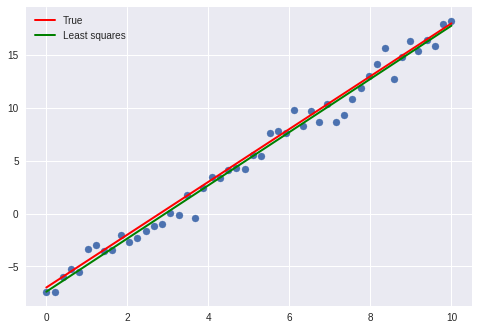

In [6]:
### Parameters for data generation ###
true_b1 = 2.5
true_b0 = -7
size = 50
x_range = (0,10)
noise_mean = 0 
noise_std = 1

# Generate the data
data_x, data_y = generate_data(true_b1, true_b0, size, 
                               x_range = x_range, 
                               noise_mean = noise_mean, 
                               noise_std = noise_std)

# Predict data's parameters
b1, b0 = predict(data_x, data_y)

# Visualize the data
print("true b1 : {}\ntrue b0 : {}".format(true_b1, true_b0))
print("calculated b1 : {}\ncalculated b0 : {}".format(b1, b0))
animate(data_x, data_y, true_b1, true_b0, b1, b0,x_range=x_range)

## Gradient descent

Let's find derivatives: 
$$\frac{\partial J}{\partial \beta_{1}} = - \frac{1}{n} \sum_{i=1}^{n} 2 x_{i}(\hat{y_{i}}- (\beta_{1}x_{i} + \beta_{0}))$$

$$\frac{\partial J}{\partial \beta_{0}} = - \frac{1}{n} \sum_{i=1}^{n} 2 (\hat{y_{i}}- (\beta_{1}x_{i} + \beta_{0}))$$

And update weights :

$$\beta_{1} = \beta_{1} - \alpha \frac{\partial J}{\partial \beta_{1}}$$

$$\beta_{0} = \beta_{0} - \alpha \frac{\partial J}{\partial \beta_{0}}$$

$\alpha$ - is a learning rate, step size of gradient descent

![Gradient descent explanation](https://cdn-images-1.medium.com/max/1600/0*-gAPePneZOQsTkUx.png =400x)


In [0]:
def gradient_descent2(x, y, lr = 0.01, N=100, beta_initial = None):
  x = np.c_[np.ones_like(x), x]
  beta = np.random.randn(x.shape[1]) if beta_initial == None else beta_initial 
  for _ in range(N):
    y_model = x.dot(beta)
    error = y - y_model
    gradient = -(1.0/x.shape[0]) * error.T.dot(x)
    delta_beta = lr * gradient.T
    beta-=delta_beta
  return beta

In [0]:
def gradient_descent(x, y, lr=1e-2, N=1000):
	# b1, b0 = np.random.random(size=2)
	b1, b0 = 1, -1

	iteration = 0
	while iteration < N:
		delta = b1 * x + b0 - y
		db0 = 2 * np.sum(delta) / N
		db1 = 2 * np.dot(delta, x) / N

		b1 = b1 - lr * db1
		b0 = b0 - lr * db0
		iteration += 1

	return b1, b0

true b1 : 2.5
true b0 : -7
calculated b1 : 2.41401890109
calculated b0 : -6.4779660645


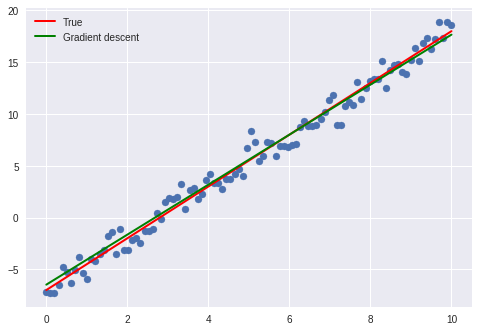

In [14]:
### Parameters for data generation ###
true_b1 = 2.5
true_b0 = -7
size = 100
x_range = (0,10)
noise_mean = 0 
noise_std = 1

# generate the data
data_x, data_y = generate_data(true_b1, true_b0, size, 
                               x_range = x_range, 
                               noise_mean = noise_mean, 
                               noise_std = noise_std)

### Gradient descent parameters ###
# learning rate
lr = 5e-2
# Number of iterations
n_iterations=1000

# Predict data's parameters
b1, b0 = gradient_descent(data_x, data_y, lr=lr, N=n_iterations)

# visualize the data
print("true b1 : {}\ntrue b0 : {}".format(true_b1, true_b0))
print("calculated b1 : {}\ncalculated b0 : {}".format(b1, b0))
animate(data_x, data_y, true_b1, true_b0, b1, b0,x_range=x_range, label="Gradient descent")

Scikit-learn implementation

In [53]:
import pandas as pd

df = pd.read_csv('mpg.csv')
with pd.option_context('display.max_rows', 100, 'display.max_columns', 50, 'display.width', 500):
	display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Name isn't important

In [0]:
df = df.drop('name', axis=1)

Data contains ''?'' marks, we should replace them with nan values

In [58]:
print(df.loc[354])

mpg             34.5
cylinders          4
displacement     100
horsepower         ?
weight          2320
acceleration    15.8
model_year        81
origin             2
Name: 354, dtype: object


In [0]:
import numpy as np

df = df.replace('?', np.nan)
df = df.dropna()

Let's take a look on "origin" column values

In [60]:
df['origin'].unique()

array([1, 3, 2])

In [0]:
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df = pd.get_dummies(df, columns=['origin'])

In [62]:
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin_america  origin_asia  origin_europe  
0               1            0              0  
1               1            0              0  
2               1            0              0  
3               1            0              0  
4               1            0              0  


Separate data on features and labels

In [0]:
X = df.drop('mpg', axis=1)
y = df[['mpg']]

Let's split our data on training and testing sets using scikit-learn   ```train_test_split
``` function





In [0]:
from sklearn.model_selection import train_test_split

# Split X and y on training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [67]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
# feed the linear regression with the train data to obtain a model.
regression_model.fit(X_train, y_train)

coefficients = []
# add beta0
coefficients.append(regression_model.intercept_[0]) 
equation = 'Y = ' + str(round(coefficients[0],2))
for i in range(X_train.shape[1]):
    coefficients.append(regression_model.coef_[0][i])
    equation += ' + ' + str(round(regression_model.coef_[0][i],2))+'X'+str(i+1)
    
# print result equation
print(equation)

Y = -17.96 + -0.17X1 + 0.02X2 + -0.01X3 + -0.01X4 + 0.19X5 + 0.77X6 + -1.76X7 + 0.96X8 + 0.8X9


Model  $R^2$ score 

In [68]:
regression_model.score(X_test, y_test)

0.8285937887753855

Mean squared error

In [69]:
from sklearn.metrics import mean_squared_error
import math

y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)

print(math.sqrt(regression_model_mse))

3.447066660016477


Make predictions

In [70]:
regression_model.predict([[4, 121, 110, 2800, 15.4, 81, 0, 1, 0]])

array([[28.79446916]])

Text(0,0.5,'y')

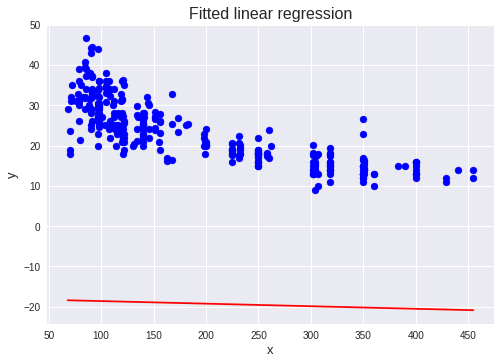

In [76]:
import matplotlib.pyplot as plt

projected_column = 'displacement'
max_x = np.int64(X_train[projected_column].max())
min_x = np.int64(X_train[projected_column].min())
x = list(X_train[projected_column])
y = list(y_train['mpg'])
m = coefficients[df.columns.get_loc(projected_column)+1]
b = coefficients[0]
# now we are going to plot the points and the model obtained
plt.scatter(x, y, color='blue')  # you can use test_data_X and test_data_Y instead.
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r')
plt.title('Fitted linear regression', fontsize=16)
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)

References:

http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/  
https://www.cs.toronto.edu/~frossard/post/linear_regression/